## 6.4　正則化

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-master/ch01')
sys.path.append(os.pardir)

In [3]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

### 6.4.1　過学習

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

print(x_train.shape)
print(t_train.shape)

(300, 784)
(300,)


In [5]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch:' + str(epoch_cnt) + ', train acc:' + str(train_acc) + ', test acc:' + str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.07666666666666666, test acc:0.1191
epoch:1, train acc:0.13, test acc:0.1324
epoch:2, train acc:0.17666666666666667, test acc:0.1493
epoch:3, train acc:0.20666666666666667, test acc:0.1635
epoch:4, train acc:0.22333333333333333, test acc:0.179
epoch:5, train acc:0.25, test acc:0.1964
epoch:6, train acc:0.2633333333333333, test acc:0.2034
epoch:7, train acc:0.29333333333333333, test acc:0.2266
epoch:8, train acc:0.33, test acc:0.24
epoch:9, train acc:0.3333333333333333, test acc:0.2497
epoch:10, train acc:0.3566666666666667, test acc:0.262
epoch:11, train acc:0.37, test acc:0.277
epoch:12, train acc:0.4033333333333333, test acc:0.2909
epoch:13, train acc:0.42333333333333334, test acc:0.3106
epoch:14, train acc:0.45, test acc:0.3352
epoch:15, train acc:0.44666666666666666, test acc:0.3458
epoch:16, train acc:0.47, test acc:0.3549
epoch:17, train acc:0.48, test acc:0.3662
epoch:18, train acc:0.5066666666666667, test acc:0.3871
epoch:19, train acc:0.5166666666666667, te

epoch:163, train acc:1.0, test acc:0.7221
epoch:164, train acc:1.0, test acc:0.7222
epoch:165, train acc:1.0, test acc:0.7219
epoch:166, train acc:1.0, test acc:0.7216
epoch:167, train acc:1.0, test acc:0.7231
epoch:168, train acc:1.0, test acc:0.7252
epoch:169, train acc:1.0, test acc:0.7234
epoch:170, train acc:1.0, test acc:0.7244
epoch:171, train acc:1.0, test acc:0.7234
epoch:172, train acc:1.0, test acc:0.7225
epoch:173, train acc:1.0, test acc:0.7236
epoch:174, train acc:1.0, test acc:0.7239
epoch:175, train acc:1.0, test acc:0.7249
epoch:176, train acc:1.0, test acc:0.7255
epoch:177, train acc:1.0, test acc:0.722
epoch:178, train acc:1.0, test acc:0.7232
epoch:179, train acc:1.0, test acc:0.725
epoch:180, train acc:1.0, test acc:0.7235
epoch:181, train acc:1.0, test acc:0.7224
epoch:182, train acc:1.0, test acc:0.7207
epoch:183, train acc:1.0, test acc:0.7231
epoch:184, train acc:1.0, test acc:0.7222
epoch:185, train acc:1.0, test acc:0.7253
epoch:186, train acc:1.0, test acc:0

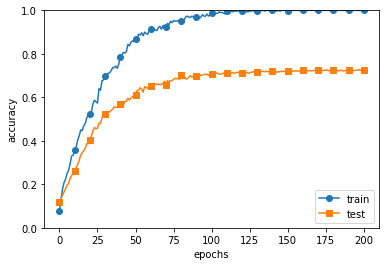

In [6]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3　Dropout

In [7]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask